# Análise exploratória de dados

In [26]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
colors = ["#3AA6B9", "#FFD0D0", "#FF9EAA"]

sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Descrição dos dados

Um conjunto de dados sobre carros e seus preços e características associados; fabricados entre 1970-82 nos EUA, Europa e Japão.

Este conjunto de dados foi retirado da biblioteca StatLib, mantida na Carnegie Mellon University. O conjunto de dados foi usado na American Statistical Association Exposition de 1983.

In [28]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [30]:
df.shape

(398, 9)

In [31]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

#### São 9 variáveis, 5 quantitativas contínuas, 2 quantitativas discretas e 2 qualitativas nominais.

In [32]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,mpg,Medida utilizada para determinar a eficiência ...,quantitativa,contínua
1,cylinders,Quantidade de cilindros,quantitativa,discreta
2,displacement,Se refere ao volume de gás sugado ou descarreg...,quantitativa,contínua
3,horsepower,Representa a quantidade de trabalho que um mot...,quantitativa,contínua
4,weight,Peso do veículo,quantitativa,contínua
5,acceleration,Mecanismo que permite ao motorista aumentar ou...,quantitativa,contínua
6,model_year,Ano de fabricação,quantitativa,discreta
7,origin,País de origem,qualitativa,nominal
8,name,Nome do modelo,qualitativa,nominal


## 2. Perguntas de partida e hipóteses

* Existem dados faltantes, se sim quantos e em quais variáveis?
* Qual a distribuição dos dados (variável por variável)?

#### Existem dados faltantes, se sim quantos e em quais variáveis?

In [33]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [34]:
df.dropna(inplace=True)

In [35]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [36]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin           object
name             object
dtype: object

#### Qual a distribuição dos dados (variável por variável)?

In [38]:
df.describe() #apenas colunas númericas

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


#### Marcas de carro mais populares

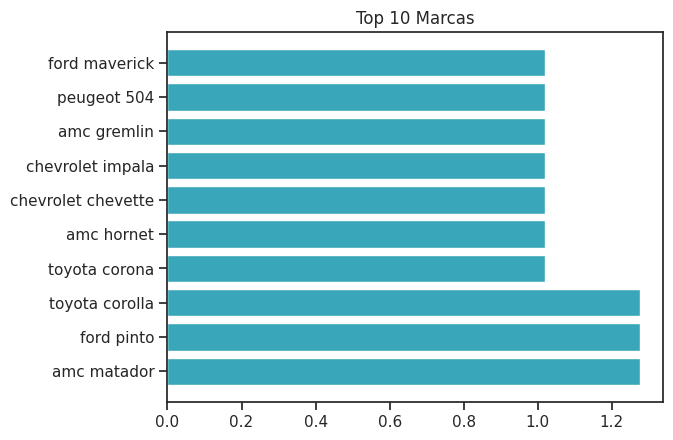

In [23]:
porcentagem = df['name'].value_counts()*100/sum(df['name'].value_counts())
popular = percent.index[:10]

plt.barh(popular, width=percent[:10])
plt.title('Top 10 Marcas')
plt.show()

## 3. Insights